<h2 align=center>Exploratory Data Analysis With Python and Pandas</h2>
<img src="logo.png">

### Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calmap
from pandas_profiling import ProfileReport

ModuleNotFoundError: No module named 'calmap'

Link to data source: https://www.kaggle.com/aungpyaeap/supermarket-sales

**Context**

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data.

**Data Dictionary**

1. ***Invoice id:*** Computer generated sales slip invoice identification number

2. ***Branch:*** Branch of supercenter (3 branches are available identified by A, B and C).

3. ***City:*** Location of supercenters

4. ***Customer type:*** Type of customers, recorded by Members for customers using member card and Normal for without member card.

5. ***Gender:*** Gender type of customer

6. ***Product line:*** General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

7. ***Unit price:*** Price of each product in USD

8. ***Quantity:*** Number of products purchased by customer

9. ***Tax:*** 5% tax fee for customer buying

10. ***Total:*** Total price including tax

11. ***Date:*** Date of purchase (Record available from January 2019 to March 2019)

12. ***Time:*** Purchase time (10am to 9pm)

13. ***Payment:*** Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

14. ***COGS:*** Cost of goods sold

15. ***Gross margin percentage:*** Gross margin percentage

16. ***Gross income:*** Gross income

17. ***Rating:*** Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

### Task 1: Initial Data Exploration

In [14]:
# 1. 读取数据
df=pd.read_csv("C:/Users/62678/Desktop/supermarket_sales.csv")

In [15]:
# 查看数据
df.head(5)
df.tail(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1.0,3.291,69.111,2/22/19,15:33,Cash,65.82,4.761905,3.291,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7.0,30.919,649.299,2/18/19,13:28,Cash,618.38,4.761905,30.919,6.6
1000,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7.0,30.919,649.299,2/18/19,13:28,Cash,618.38,4.761905,30.919,6.6
1001,745-74-0715,A,Yangon,Normal,Male,Electronic accessories,NaN,2.0,5.803,121.863,3/10/19,20:46,Ewallet,116.06,4.761905,5.803,8.8
1002,452-04-8808,B,Mandalay,Normal,Male,Electronic accessories,87.08,NaN,30.478,640.038,1/26/19,15:17,Cash,609.56,4.761905,30.478,5.5


In [16]:
# 查看数据整体信息
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [21]:
df.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                          float64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

In [18]:
# 发现一些数据类型不符合预期，处理一下
df["Date"]

0        1/5/19
1        3/8/19
2        3/3/19
3       1/27/19
4        2/8/19
         ...   
998     2/22/19
999     2/18/19
1000    2/18/19
1001    3/10/19
1002    1/26/19
Name: Date, Length: 1003, dtype: object

In [19]:
df["Date"]= pd.to_datetime(df["Date"])

In [20]:
df["Date"]

0      2019-01-05
1      2019-03-08
2      2019-03-03
3      2019-01-27
4      2019-02-08
          ...    
998    2019-02-22
999    2019-02-18
1000   2019-02-18
1001   2019-03-10
1002   2019-01-26
Name: Date, Length: 1003, dtype: datetime64[ns]

In [22]:
df.set_index("Date",inplace=True) # 把Date 变成index column

In [23]:
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1
2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6
2019-03-03,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4
2019-01-27,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4
2019-02-08,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [29]:
# 查看变量的statistic 属性（仅仅看的到numerical 变量）
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,996.000000,983.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000
mean,55.764568,5.501526,15.400368,323.407726,308.007358,4.761905,15.400368,6.972682
std,26.510165,2.924673,11.715192,246.019028,234.303836,0.000000,11.715192,1.717647
min,10.080000,1.000000,0.508500,10.678500,10.170000,4.761905,0.508500,4.000000
25%,33.125000,3.000000,5.894750,123.789750,117.895000,4.761905,5.894750,5.500000
50%,55.420000,5.000000,12.096000,254.016000,241.920000,4.761905,12.096000,7.000000
75%,78.085000,8.000000,22.539500,473.329500,450.790000,4.761905,22.539500,8.500000
max,99.960000,10.000000,49.650000,1042.650000,993.000000,4.761905,49.650000,10.000000


### Task 2: Univariate Analysis

**Question 1:** What does the distribution of customer ratings looks like? Is it skewed?

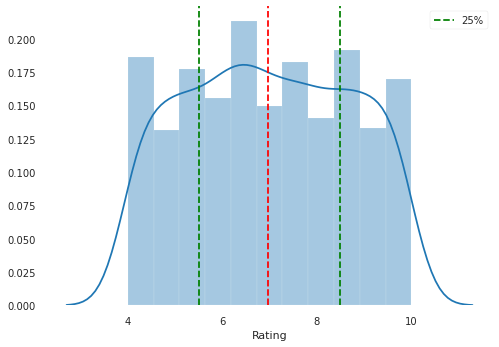

In [20]:
# 1.查看单个变量的 分布
sns.distplot(df["Rating"])
plt.axvline(x=np.mean(df["Rating"]),c="red",ls="--")
plt.axvline(x=np.percentile(df["Rating"],25),c="green",ls="--",label="25%")
plt.axvline(x=np.percentile(df["Rating"],75),c="green",ls="--")
plt.legend()

array([[<AxesSubplot:title={'center':'Unit price'}>,
        <AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'Tax 5%'}>],
       [<AxesSubplot:title={'center':'Total'}>,
        <AxesSubplot:title={'center':'cogs'}>,
        <AxesSubplot:title={'center':'gross margin percentage'}>],
       [<AxesSubplot:title={'center':'gross income'}>,
        <AxesSubplot:title={'center':'Rating'}>, <AxesSubplot:>]],
      dtype=object)

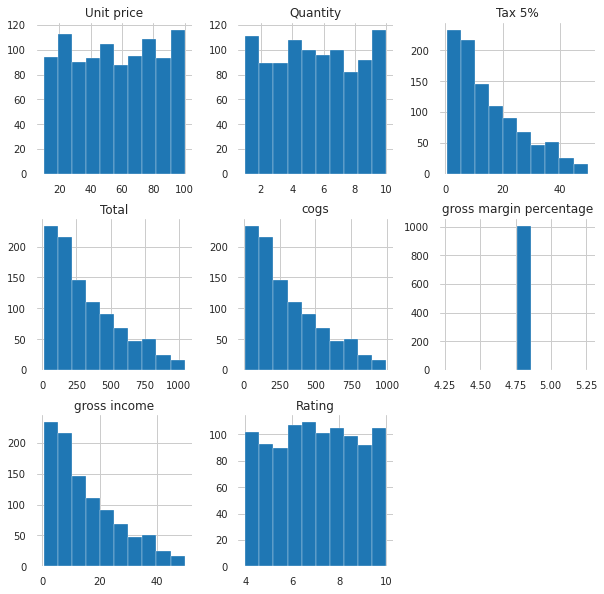

In [22]:
# 2. 查看所有numeric 变量的分布
df.hist(figsize=(10,10))
# 看出 unit price,quantity -- uniform distributed
# tax--right skew
# total, cogs, gross income -- high correlated varible --follow same distrbution
# rating -- uniform dastribution

**Question 2:** Do aggregate sales numbers differ by much between branches?

<AxesSubplot:xlabel='Branch', ylabel='count'>

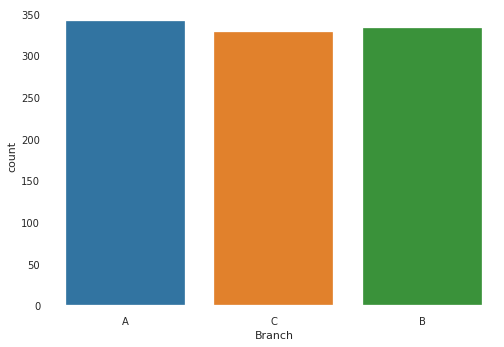

In [23]:
# 3. 对于categories ，看下不同取值的数量
sns.countplot(df["Branch"])

In [24]:
df["Branch"].value_counts()

A    342
B    333
C    328
Name: Branch, dtype: int64

### Task 3: Bivariate Analysis

In [ ]:
# 看两个的变量的关系：其实就看A变量不同取值下的B变量的分布

In [30]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Time',
       'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating'],
      dtype='object')

**Question 3:** Is there a relationship between gross income and customer ratings?

<AxesSubplot:xlabel='Rating', ylabel='gross income'>

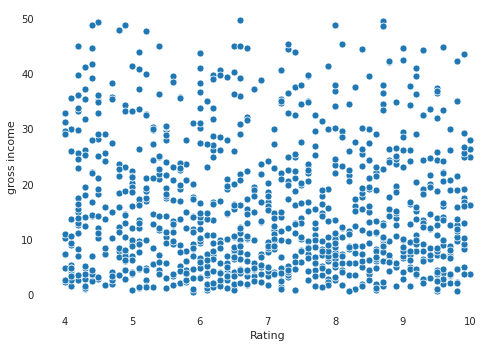

In [31]:
# 1.查看两个 numerical变量的关系
sns.scatterplot(df["Rating"],df['gross income'])

<AxesSubplot:xlabel='Rating', ylabel='gross income'>

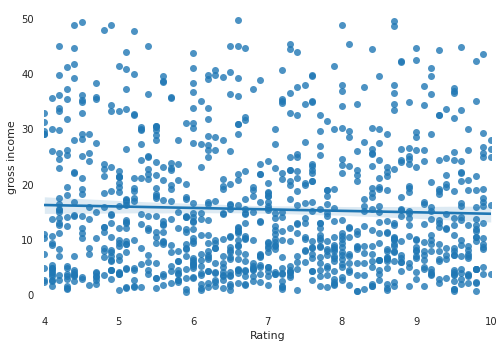

In [32]:
sns.regplot(df["Rating"],df['gross income'])
# 线很平，看起来好像没什么关系

<AxesSubplot:xlabel='Branch', ylabel='gross income'>

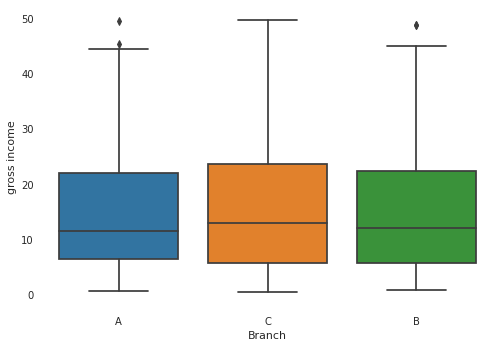

In [34]:
# 看categories 变量和 numerci 变量的关系
sns.boxplot(x=df["Branch"],y=df['gross income'])

<AxesSubplot:xlabel='Gender', ylabel='gross income'>

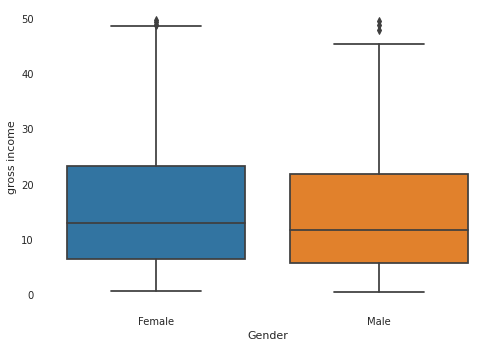

In [35]:
sns.boxplot(x=df["Gender"],y=df['gross income'])
# 似乎很均匀

**Question 4:** Is there a noticeable time trend in gross income?

In [24]:
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1
2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6
2019-03-03,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4
2019-01-27,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4
2019-02-08,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [25]:
df.groupby(df.index).mean()  # 按照date聚集，计算每列的mean

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,
2019-01-01,54.995833,6.454545,18.830083,395.431750,376.601667,4.761905,18.830083,6.583333
2019-01-02,44.635000,6.000000,11.580375,243.187875,231.607500,4.761905,11.580375,6.050000
2019-01-03,59.457500,4.625000,12.369813,259.766062,247.396250,4.761905,12.369813,8.112500
2019-01-04,51.743333,5.333333,12.886417,270.614750,257.728333,4.761905,12.886417,6.516667
2019-01-05,61.636667,4.583333,14.034458,294.723625,280.689167,4.761905,14.034458,7.433333
...,...,...,...,...,...,...,...,...
2019-03-26,42.972308,4.000000,7.188692,150.962538,143.773846,4.761905,7.188692,6.623077
2019-03-27,56.841000,4.500000,13.822950,290.281950,276.459000,4.761905,13.822950,6.760000
2019-03-28,45.525000,4.800000,10.616200,222.940200,212.324000,4.761905,10.616200,7.050000


In [26]:
df.groupby(df.index).mean().index

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-12',
               '2019-01-13', '2019-01-14', '2019-01-15', '2019-01-16',
               '2019-01-17', '2019-01-18', '2019-01-19', '2019-01-20',
               '2019-01-21', '2019-01-22', '2019-01-23', '2019-01-24',
               '2019-01-25', '2019-01-26', '2019-01-27', '2019-01-28',
               '2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01',
               '2019-02-02', '2019-02-03', '2019-02-04', '2019-02-05',
               '2019-02-06', '2019-02-07', '2019-02-08', '2019-02-09',
               '2019-02-10', '2019-02-11', '2019-02-12', '2019-02-13',
               '2019-02-14', '2019-02-15', '2019-02-16', '2019-02-17',
               '2019-02-18', '2019-02-19', '2019-02-20', '2019-02-21',
               '2019-02-22', '2019-02-23', '2019-02-24', '2019-02-25',
      

<AxesSubplot:xlabel='Date', ylabel='gross income'>

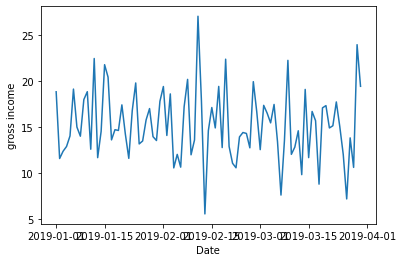

In [28]:
# 画时间序列图
sns.lineplot(x=df.groupby(df.index).mean().index,
            y=df.groupby(df.index).mean()["gross income"])

D:\Anaconda3\lib\site-packages\seaborn\_core.py:1057: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  comp_col.loc[orig.index] = pd.to_numeric(axis.convert_units(orig))


ValueError: cannot reindex on an axis with duplicate labels

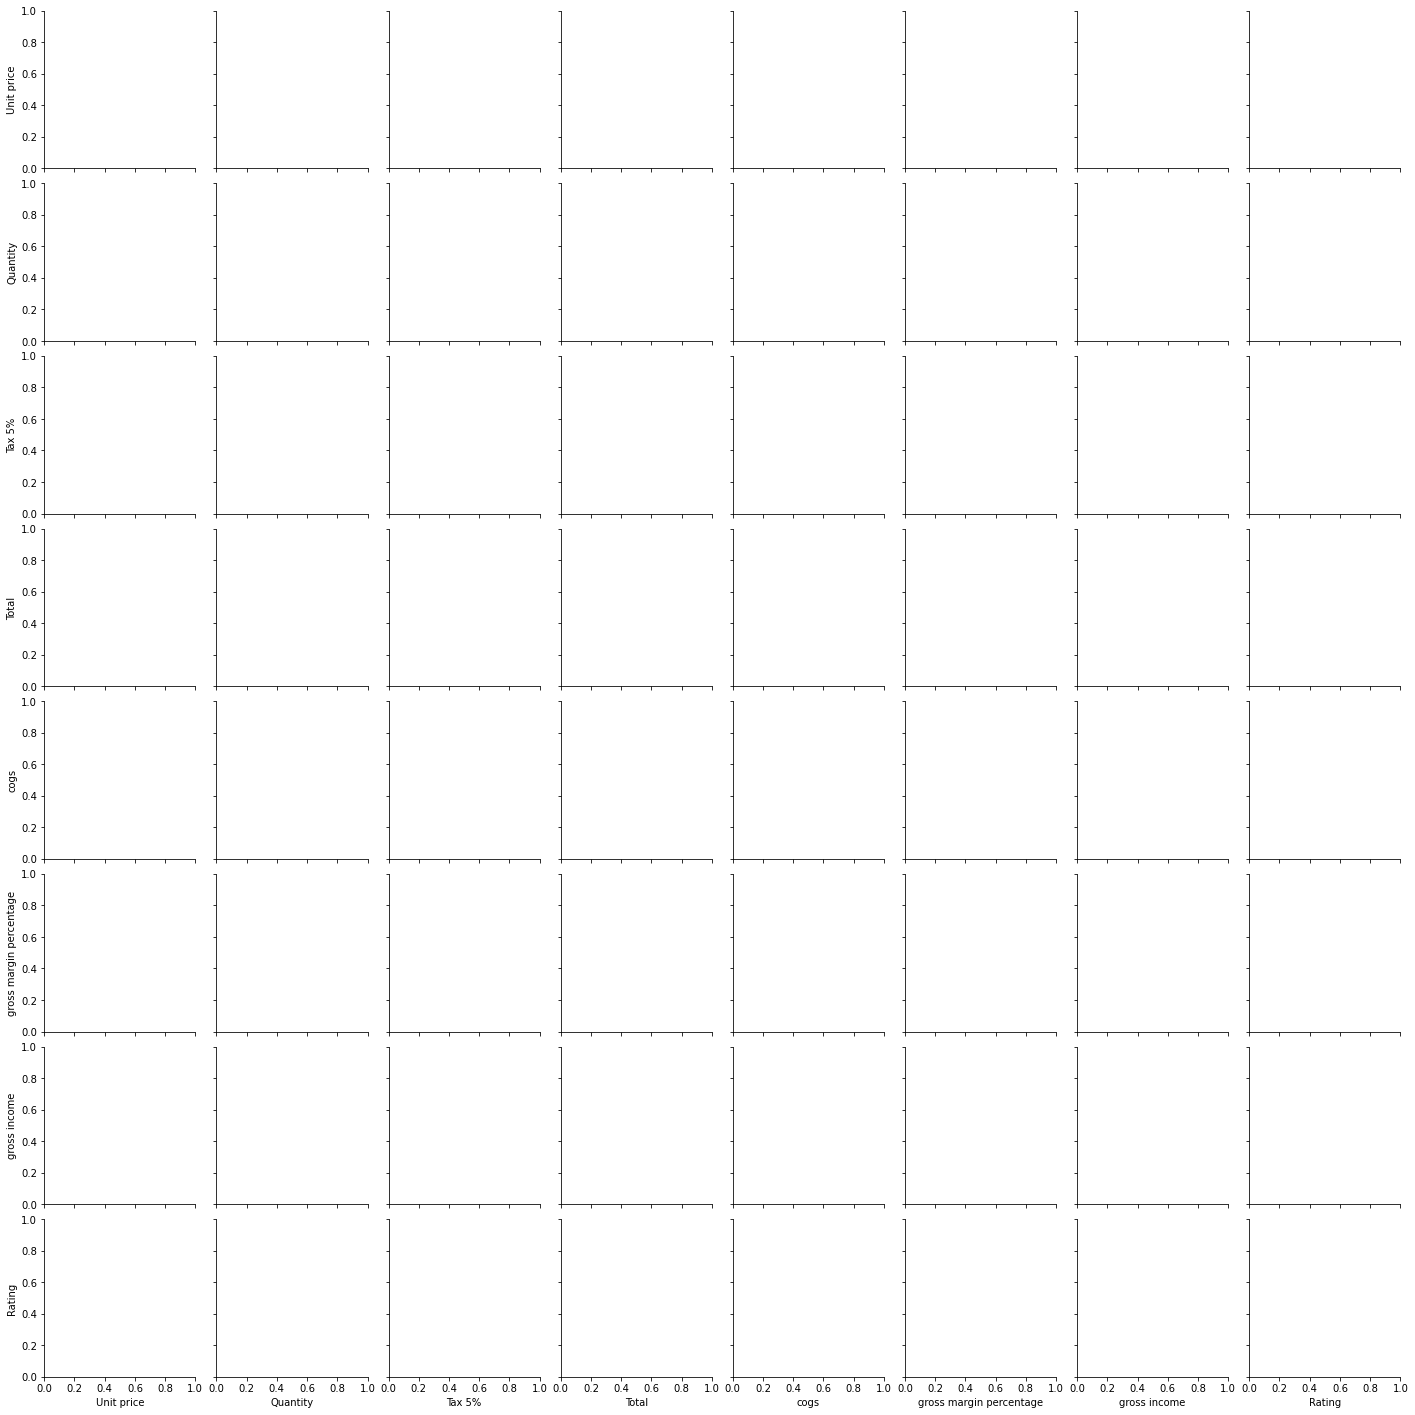

In [29]:
sns.pairplot(df) 
# 画出每两列的图，对于很大的数据不适用

### Task 4: Dealing With Duplicate Rows and Missing Values

In [30]:
# 查看是否有duplicate 的行
df.duplicated()

Date
2019-01-05    False
2019-03-08    False
2019-03-03    False
2019-01-27    False
2019-02-08    False
              ...  
2019-02-22    False
2019-02-18    False
2019-02-18     True
2019-03-10     True
2019-01-26     True
Length: 1003, dtype: bool

In [32]:
df.duplicated().sum()

3

In [33]:
# 查看具体是哪几行重复
df[df.duplicated()==True]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
2019-02-18,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7.0,30.919,649.299,13:28,Cash,618.38,4.761905,30.919,6.6
2019-03-10,745-74-0715,A,Yangon,Normal,Male,Electronic accessories,NaN,2.0,5.803,121.863,20:46,Ewallet,116.06,4.761905,5.803,8.8
2019-01-26,452-04-8808,B,Mandalay,Normal,Male,Electronic accessories,87.08,NaN,30.478,640.038,15:17,Cash,609.56,4.761905,30.478,5.5


In [35]:
# 删除重复行
df.drop_duplicates(inplace==True)

NameError: name 'inplace' is not defined

In [36]:
# 查看missing value
df.isna().sum()

Invoice ID                  0
Branch                      0
City                        0
Customer type              79
Gender                      0
Product line               43
Unit price                  7
Quantity                   20
Tax 5%                      0
Total                       0
Time                        0
Payment                     0
cogs                        0
gross margin percentage     0
gross income                0
Rating                      0
dtype: int64

<AxesSubplot:ylabel='Date'>

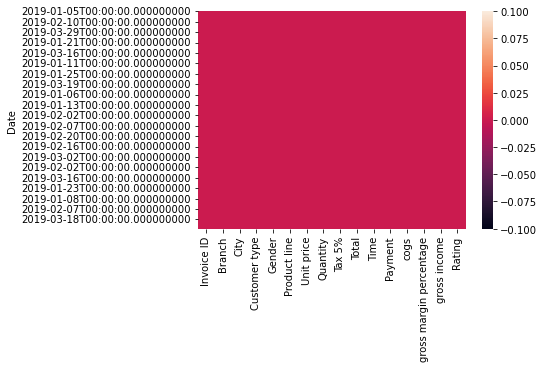

In [42]:
sns.heatmap(df.isnull())

In [38]:
# 处理空值
df.fillna(0)
df.fillna(df.mean(),inplace=True) # 这个只能对numerical 列有用

C:\Users\62678\AppData\Local\Temp\ipykernel_1692\1277898670.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(),inplace=True)


In [39]:
# 对于 categories 列空值处理
df.mode()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,452-04-8808,A,Yangon,Normal,Female,Fashion accessories,55.764568,10.0,4.1540,87.2340,14:42,Cash,83.08,4.761905,4.1540,6.0
1,745-74-0715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.4640,93.7440,19:48,Ewallet,89.28,NaN,4.4640,NaN
2,849-09-3807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.8030,121.8630,NaN,NaN,116.06,NaN,5.8030,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.3770,175.9170,NaN,NaN,167.54,NaN,8.3770,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0045,189.0945,NaN,NaN,180.09,NaN,9.0045,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.3260,216.8460,NaN,NaN,206.52,NaN,10.3260,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.3635,217.6335,NaN,NaN,207.27,NaN,10.3635,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.5700,263.9700,NaN,NaN,251.40,NaN,12.5700,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.1880,276.9480,NaN,NaN,263.76,NaN,13.1880,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.4280,470.9880,NaN,NaN,448.56,NaN,22.4280,NaN


In [41]:
df.fillna(df.mode().loc[0],inplace=True)

In [43]:
# 对于小的dataset,以上所有可以用profile这个包来实现

dataset=pd.read_csv("C:/Users/62678/Desktop/supermarket_sales.csv")
prof= ProfileReport(dataset)
prof

NameError: name 'ProfileReport' is not defined

### Task 5: Correlation Analysis

In [44]:
np.corrcoef(df["gross income"],df["Rating"])

array([[ 1.       , -0.0385905],
       [-0.0385905,  1.       ]])

In [46]:
# 看所有列的
np.round(df.corr(),2)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.00,0.02,0.63,0.63,0.63,NaN,0.63,-0.01
Quantity,0.02,1.00,0.70,0.70,0.70,NaN,0.70,-0.02
Tax 5%,0.63,0.70,1.00,1.00,1.00,NaN,1.00,-0.04
Total,0.63,0.70,1.00,1.00,1.00,NaN,1.00,-0.04
cogs,0.63,0.70,1.00,1.00,1.00,NaN,1.00,-0.04
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.63,0.70,1.00,1.00,1.00,NaN,1.00,-0.04
Rating,-0.01,-0.02,-0.04,-0.04,-0.04,NaN,-0.04,1.00


<AxesSubplot:>

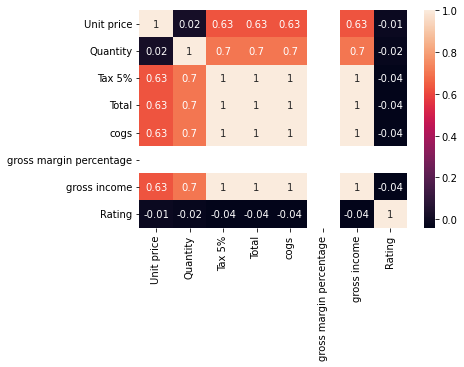

In [47]:
sns.heatmap(np.round(df.corr(),2),annot=True)

### Helpful Links

1. More visualizations: https://www.data-to-viz.com/
2. Seaborn gallery: https://seaborn.pydata.org/examples/index.html
3. Pandas profiling documentation: https://pypi.org/project/pandas-profiling/